In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/global-video-game-sales-and-reviews/Video Games Sales.csv


# **Load the data**

In [3]:
import pandas as pd
# Loading the dataset
video_games_data = pd.read_csv('/kaggle/input/global-video-game-sales-and-reviews/Video Games Sales.csv')

# Displaying the first few rows of the dataset to understand its structure
video_games_data.head()

,index,Rank,Game Title,Platform,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global,Review
0,0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,40.43,28.39,3.77,8.54,81.12,76.28
1,1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,91.00
2,2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,14.50,12.22,3.63,3.21,33.55,82.07
3,3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,14.82,10.51,3.18,3.01,31.52,82.65
4,4,5,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,88.00


The **Video Games Sales.csv** dataset provides a comprehensive view of various video games, including:

**Rank:** The global sales rank of the game.

**Game Title:** The name of the video game.

**Platform:** The gaming platform (e.g., Wii, NES, GB).

**Year:** The release year of the game.

**Genre:** The genre of the game (e.g., Sports, Platform, Racing).

**Publisher:** The company that published the game.

**Regional Sales:** Sales figures in millions for North America, Europe, Japan, and the Rest of the World.

**Global Sales:** Total global sales in millions.

**Review:** The review score, typically on a scale of 1-10.

In [4]:
# Dropping the column associated to index as it's redundant
video_games_data = video_games_data.drop(columns=['index'])

In [6]:
# Checking for missing values in the dataset
missing_values = video_games_data.isnull().sum()

In [7]:
# Dropping rows with missing values
cleaned_data = video_games_data.dropna()

In [8]:
# Verifying the operation by checking for missing values again
missing_values_after = cleaned_data.isnull().sum()

missing_values, missing_values_after, cleaned_data.head()

(Rank              0
 Game Title        0
 Platform          0
 Year             29
 Genre             0
 Publisher         2
 North America     0
 Europe            0
 Japan             0
 Rest of World     0
 Global            0
 Review            0
 dtype: int64,
 Rank             0
 Game Title       0
 Platform         0
 Year             0
 Genre            0
 Publisher        0
 North America    0
 Europe           0
 Japan            0
 Rest of World    0
 Global           0
 Review           0
 dtype: int64,
    Rank         Game Title Platform    Year     Genre Publisher  \
 0     1         Wii Sports      Wii  2006.0    Sports  Nintendo   
 1     2  Super Mario Bros.      NES  1985.0  Platform  Nintendo   
 2     3     Mario Kart Wii      Wii  2008.0    Racing  Nintendo   
 3     4  Wii Sports Resort      Wii  2009.0    Sports  Nintendo   
 4     5             Tetris       GB  1989.0    Puzzle  Nintendo   
 
    North America  Europe  Japan  Rest of World  Global  Review  
 0

# **Ideas :**

1. **Trend Analysis:**

* **Time-based Trends:** Analyze sales and genre popularity across different years to identify changing consumer preferences.

* **Platform Evolution:** Study how preferences for gaming platforms have shifted over time.

* **Regional Differences:** Compare gaming trends in North America, Europe, Japan, and other regions to understand geographical variations in gaming tastes.

2. **Sales Forecasting:**

* Develop statistical models (e.g., regression analysis, time series forecasting) using historical sales data.

* Incorporate variables like genre, platform, and regional sales to enhance the model's accuracy.

* Use this model to predict future game sales, assisting stakeholders in decision-making.

3. **Game Evaluation & Strategy Planning:**

* **Review Correlation Analysis:** Assess the relationship between review scores and global sales. Identify genres or platforms where reviews significantly impact sales.

* **Targeted Strategy Development:** Based on findings, advise on game development focus areas and marketing strategies tailored to specific genres, platforms, or regions.

4. **Competition Analysis:**

* Perform comparative analysis of game publishers based on review scores and sales figures.

* Benchmark industry leaders against emerging competitors to identify market dynamics and competitive strategies.

5. **Consumer Behaviour Insights:**

* Analyze sales data and game preferences across different regions.

* Identify unique gaming patterns in various geographies to inform region-specific marketing and launch strategies.

# **Trend Analysis**

This analysis focuses on examining how video game preferences have evolved over the years, taking into account variables like genre, publisher, platform, and region. We'll look at sales trends, changes in popular genres, and shifts in platform preferences.

**a. Time-based Trends in Genres and Platforms**

* Objective: Identify how the popularity of different game genres and platforms has changed over time.

* Approach: Group the data by year and genre/platform and then analyze the sales figures to observe trends.

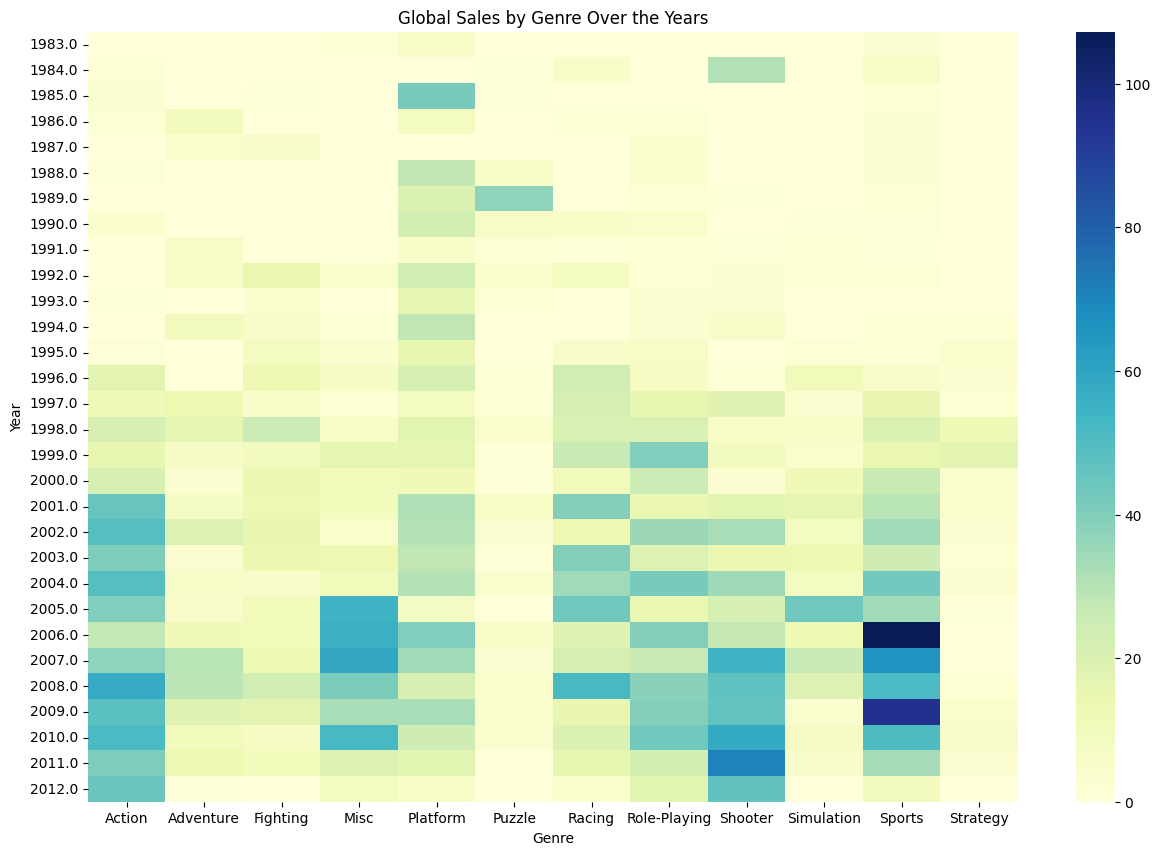

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Grouping data by Year and Genre and summing up the global sales
genre_yearly_sales = cleaned_data.groupby(['Year', 'Genre']).agg({'Global': 'sum'}).reset_index()

pivot_genre_sales = genre_yearly_sales.pivot(index='Year', columns='Genre', values='Global')
pivot_genre_sales = pivot_genre_sales.fillna(0)  # Replacing NaN with 0 for years where a genre had no sales


# Plotting the data
plt.figure(figsize=(15, 10))
sns.heatmap(pivot_genre_sales, annot=False, cmap="YlGnBu")
plt.title('Global Sales by Genre Over the Years')
plt.ylabel('Year')
plt.xlabel('Genre')
plt.show()

**Certain genres show consistently high sales across multiple years, indicating enduring popularity.**

**Some genres exhibit peaks in certain years, suggesting periods of heightened popularity.**

### **Let's proceed with these analyses, starting with a deeper dive into time-based trends in genre popularity, focusing on how specific genres have risen or fallen in popularity over time.**

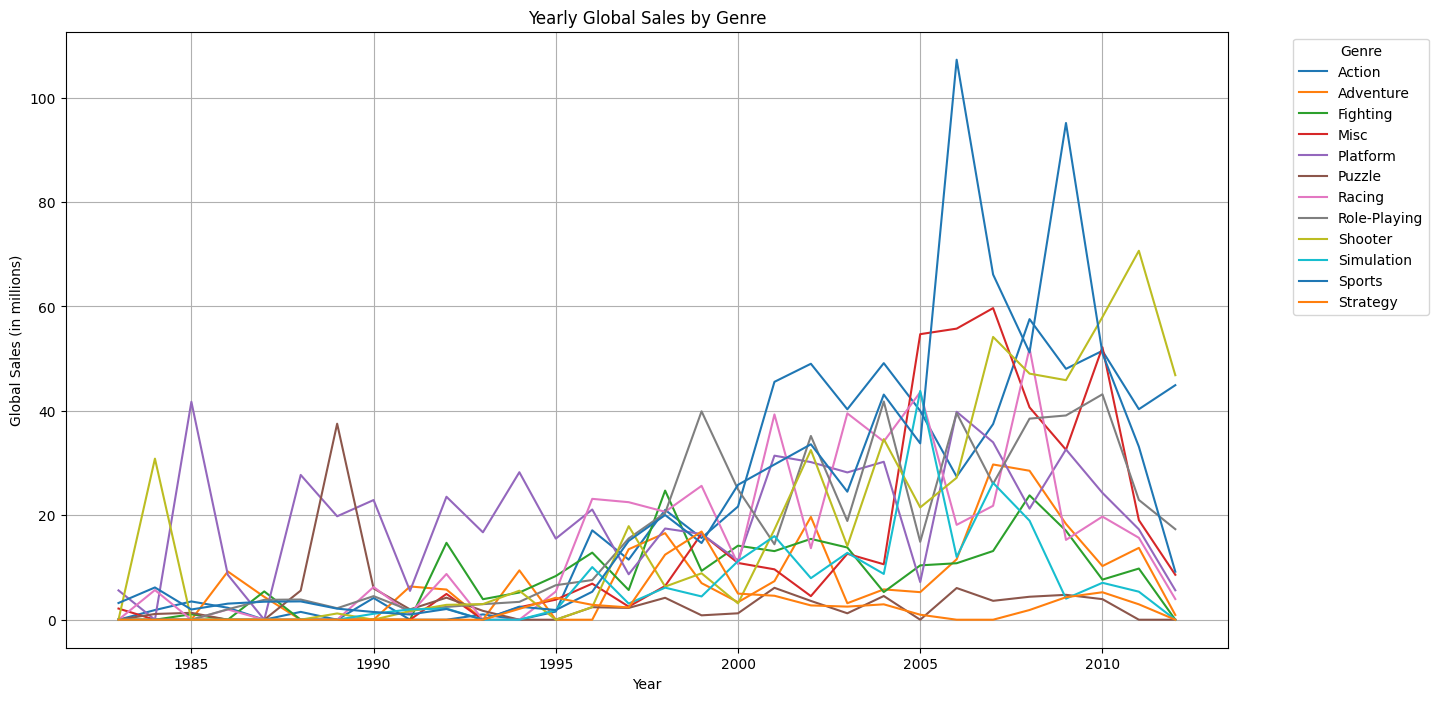

In [11]:
# Analyzing the popularity of specific genres over time
# Grouping the data by year and genre and calculating the total sales
genre_trends = cleaned_data.groupby(['Year', 'Genre'])['Global'].sum().unstack(fill_value=0)

# Plotting the trends over time for each genre
plt.figure(figsize=(15, 8))
genre_trends.plot(kind='line', ax=plt.gca())
plt.title('Yearly Global Sales by Genre')
plt.xlabel('Year')
plt.ylabel('Global Sales (in millions)')
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

**Key observations:**

* Certain genres have shown significant growth or decline in specific periods, indicating shifts in consumer preferences.

* Some genres maintain a consistent level of sales, suggesting steady popularity.

**Next, we'll enhance our understanding of platform evolution. We'll focus on the lifecycle of key gaming platforms, looking at their peaks in popularity and subsequent declines. This will help us understand not only which platforms were popular at certain times but also how long they remained at the forefront of the gaming industry.**

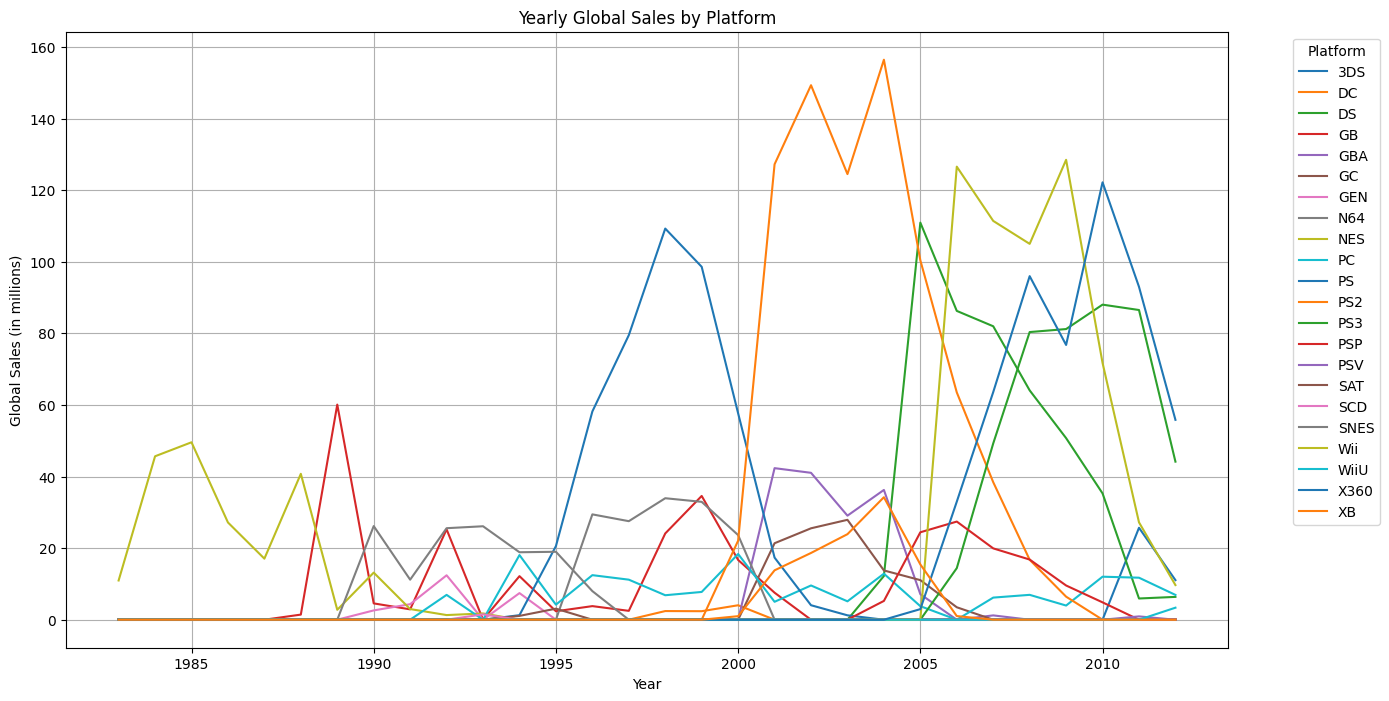

In [12]:
# Analyzing the lifecycle of key gaming platforms over time
# Grouping the data by year and platform and calculating the total sales
platform_trends = cleaned_data.groupby(['Year', 'Platform'])['Global'].sum().unstack(fill_value=0)

# Plotting the trends over time for each platform
plt.figure(figsize=(15, 8))
platform_trends.plot(kind='line', ax=plt.gca())
plt.title('Yearly Global Sales by Platform')
plt.xlabel('Year')
plt.ylabel('Global Sales (in millions)')
plt.legend(title='Platform', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

**Key observations:**

* Some platforms experience a sharp increase in sales, indicating a period of dominance, followed by a gradual or sharp decline as they are replaced by newer platforms.

* The lifecycle of each platform varies, with some maintaining popularity for an extended period, while others have shorter spans of high sales.

Finally, let's explore regional differences in gaming trends. We will analyze how game preferences vary across different regions like North America, Europe, Japan, and the Rest of the World. This will involve looking at sales by genre and platform in each region to identify unique regional preferences or trends.

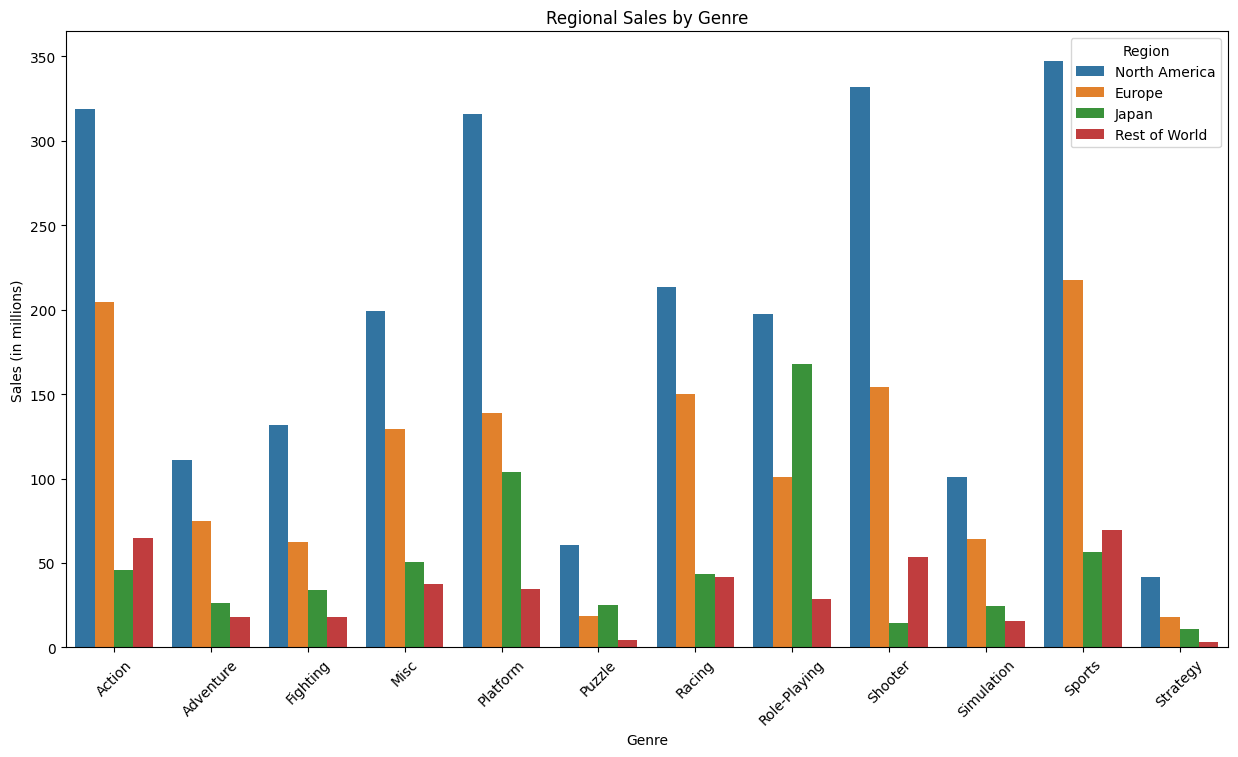

In [13]:
# Analyzing regional differences in gaming trends
# Aggregating sales by genre for each region
regional_genre_sales = cleaned_data.groupby('Genre').agg({
    'North America': 'sum',
    'Europe': 'sum',
    'Japan': 'sum',
    'Rest of World': 'sum'
}).reset_index()

# Melting the dataframe for better visualization
melted_regional_genre_sales = pd.melt(regional_genre_sales, id_vars=['Genre'], 
                                      value_vars=['North America', 'Europe', 'Japan', 'Rest of World'],
                                      var_name='Region', value_name='Sales')

# Plotting the regional differences in genre preferences
plt.figure(figsize=(15, 8))
sns.barplot(x='Genre', y='Sales', hue='Region', data=melted_regional_genre_sales)
plt.title('Regional Sales by Genre')
plt.xlabel('Genre')
plt.ylabel('Sales (in millions)')
plt.xticks(rotation=45)
plt.legend(title='Region')
plt.show()

**Key observations:**

* Different genres show varying levels of popularity across regions, highlighting regional preferences.

* Some genres are universally popular across all regions, while others have significant popularity in specific regions.


# **Sales Forecasting**

In this section, we'll aim to build a model to predict future video game sales based on historical data. This involves selecting relevant features (like genre, platform, region, review scores) and employing a statistical model to forecast sales.

**a. Preparing the Data for Forecasting**

* Feature Selection: We'll choose features that are likely to influence sales, such as genre, platform, year, and review scores.

* Data Splitting: The dataset will be divided into a training set (for model building) and a test set (for model evaluation).

**b. Model Selection and Training**

* Model Choice: A regression model like Linear Regression or more advanced models like Random Forest or Gradient Boosting could be used, depending on the complexity of the data.

* Training: We'll train the model on the training set.

**c. Model Evaluation**

* Testing: We'll use the test set to evaluate the model's performance.

* Metrics: We'll use metrics like Mean Squared Error (MSE) or R-squared to assess the model's accuracy.

In [46]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

# Assuming your dataset is loaded into a DataFrame called 'cleaned_data'
# Selecting features and target variable
features = cleaned_data[['Genre', 'Platform', 'Year', 'Review']]
target = cleaned_data['Global']  # Replace 'Global' with your sales column name

# One-hot encoding categorical variables
features_encoded = pd.get_dummies(features)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_encoded, target, test_size=0.2, random_state=42)

# Model selection and training
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Predicting sales on the test set
y_pred = rf_model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 7.096552601930156
R-squared: -0.698672391062696


# **Game Evaluation & Strategy Planning**

**Approach:**

* **Correlation Analysis:** We will calculate the correlation coefficient between review scores and global sales. This will give us an overall understanding of their relationship.

* **Genre-Specific Analysis:** We will delve into specific genres to see if the correlation between review scores and sales differs from one genre to another.

* **Platform-Specific Analysis:** Similarly, we will explore if the correlation varies across different gaming platforms.

In [22]:
# Correlation Analysis between Review Scores and Global Sales
correlation_overall = cleaned_data[['Review', 'Global']].corr()

# Genre-Specific Correlation Analysis
genre_specific_corr = cleaned_data.groupby('Genre')[['Review', 'Global']].corr().iloc[0::2]['Global'].unstack(level=0)

# Platform-Specific Correlation Analysis
platform_specific_corr = cleaned_data.groupby('Platform')[['Review', 'Global']].corr().iloc[0::2]['Global'].unstack(level=0)

correlation_overall

,Review,Global
Review,1.00000,0.18189
Global,0.18189,1.00000


In [23]:
genre_specific_corr

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
Review,0.356358,0.30031,0.29064,0.010647,0.334452,0.232072,0.272876,0.264568,0.322747,0.226341,0.020476,0.049909


In [24]:
platform_specific_corr

Platform,3DS,DC,DS,GB,GBA,GC,GEN,N64,NES,PC,...,PS3,PSP,PSV,SAT,SCD,SNES,Wii,WiiU,X360,XB
Review,0.371044,-0.548001,0.325004,0.304487,0.261995,0.317487,0.411512,0.450025,0.284122,0.138556,...,0.338668,0.242015,NaN,0.640826,NaN,0.406906,0.136574,-1.0,0.271972,0.365999


**The analysis of the correlation between review scores and global sales yields the following results:**

**Overall Correlation:**

The correlation coefficient between review scores and global sales is approximately  0.18 .

This indicates a positive but relatively weak relationship between the two.

**Genre-Specific Correlation:**

The correlation varies significantly across genres. For example, genres like Action, Shooter, and Platform show a moderately positive correlation, while others like Sports and Strategy show a very weak correlation.

**Platform-Specific Correlation:**

Similar to genres, the correlation also varies across different platforms. For some platforms like 3DS, N64, and GEN, there is a moderate positive correlation, while for others, the correlation is weak or even negative in certain cases (e.g., WiiU).

**Interpretation and Strategy Implications:**

* The varying levels of correlation suggest that while review scores can be an important factor, their impact on sales is not uniform across all genres and platforms.

* For genres and platforms with higher correlations, focusing on game quality and securing good reviews could be a more effective strategy.

* For those with lower correlations, other factors like brand loyalty, marketing, or unique features might be more influential in driving sales.

> This analysis provides valuable insights for game developers and marketers in planning their strategies, especially in deciding the focus areas for development and marketing efforts.



# **Competition Analysis - Publisher Performance**

In [26]:
# Publisher Performance Comparison
# Aggregating total sales and average review scores for each publisher
publisher_performance = cleaned_data.groupby('Publisher').agg({'Global': 'sum', 'Review': 'mean'}).reset_index()

# Sorting by total global sales and average review scores
top_publishers_sales = publisher_performance.sort_values(by='Global', ascending=False).head(10)
top_publishers_reviews = publisher_performance.sort_values(by='Review', ascending=False).head(10)

top_publishers_sales

,Publisher,Global,Review
53,Nintendo,1447.81,81.627356
24,Electronic Arts,624.18,79.698314
69,Sony Computer Entertainment,377.61,81.303333
7,Activision,369.98,79.753643
78,Take-Two Interactive,208.42,83.425733
83,Ubisoft,196.32,76.015376
47,Microsoft Game Studios,169.73,82.583404
77,THQ,142.98,72.842135
68,Sega,121.80,79.401000
15,Capcom,114.33,81.997143


In [27]:
top_publishers_reviews

,Publisher,Global,Review
11,Banpresto,1.70,94.000000
87,Valve Software,3.99,93.240000
86,Valve,1.40,91.000000
50,NCSoft,1.70,90.020000
34,Havas Interactive,2.82,88.580000
73,Square EA,2.13,87.640000
42,MTV Games,9.34,87.175000
30,GameBank,1.24,87.000000
63,RedOctane,8.61,85.653333
72,Square,38.50,85.400000


**Top Publishers by Global Sales:**

**Nintendo:** Highest global sales with a substantial lead, indicating a dominant market position.

**Electronic Arts:** Second in terms of global sales, significantly behind Nintendo.

Sony Computer Entertainment, Activision, and Take-Two Interactive also feature prominently, indicating strong market presence.

**Top Publishers by Review Scores:**

Banpresto, Valve Software, and NCSoft lead in terms of average review scores, though their total global sales are comparatively lower.

Take-Two Interactive and Microsoft Game Studios stand out as they appear in both top ten lists, indicating both high sales and strong review scores.

**Insights and Implications:**

* Nintendo's dominance in sales is clear, but other publishers like Electronic Arts and Sony Computer Entertainment also have significant market shares.

* Publishers like Valve Software and Banpresto, while not leading in sales, have managed to achieve high review scores, suggesting a focus on quality.

* The presence of publishers like Take-Two Interactive and Microsoft Game Studios in both top sales and reviews lists highlights their ability to balance sales success with quality.

# **Game Performance Benchmarking Analysis**

In [29]:
# Selecting key games for comparison
# We'll choose top-selling games from different genres and publishers

# Selecting the top games based on global sales
top_games_sales = cleaned_data.sort_values(by='Global', ascending=False).head(10)

# Additionally, selecting top games based on review scores
top_games_reviews = cleaned_data.sort_values(by='Review', ascending=False).head(10)

top_games_sales[['Game Title', 'Publisher', 'Genre', 'Global', 'Review']]

,Game Title,Publisher,Genre,Global,Review
0,Wii Sports,Nintendo,Sports,81.12,76.28
1,Super Mario Bros.,Nintendo,Platform,40.24,91.00
2,Mario Kart Wii,Nintendo,Racing,33.55,82.07
3,Wii Sports Resort,Nintendo,Sports,31.52,82.65
4,Tetris,Nintendo,Puzzle,30.26,88.00
5,New Super Mario Bros.,Nintendo,Platform,29.08,90.00
6,Wii Play,Nintendo,Misc,28.71,61.64
7,Duck Hunt,Nintendo,Shooter,28.31,84.00
8,New Super Mario Bros. Wii,Nintendo,Platform,26.75,88.18
9,Nintendogs,Nintendo,Simulation,24.50,85.00


In [30]:
top_games_reviews[['Game Title', 'Publisher', 'Genre', 'Global', 'Review']]

,Game Title,Publisher,Genre,Global,Review
73,The Legend of Zelda: Ocarina of Time,Nintendo,Adventure,7.60,97.00
821,The Orange Box,Electronic Arts,Shooter,1.71,96.36
411,Metroid Prime,Nintendo,Shooter,2.82,96.35
78,Tekken 3,Sony Computer Entertainment,Fighting,7.16,96.30
461,BioShock,Take-Two Interactive,Shooter,2.58,96.12
264,Batman: Arkham Asylum,Eidos Interactive,Action,3.71,96.09
838,Resident Evil 4,Capcom,Action,1.69,95.83
278,Resident Evil 4,Capcom,Action,3.62,95.77
378,Mass Effect 2,Electronic Arts,Role-Playing,2.97,95.69
92,Halo: Combat Evolved,Microsoft Game Studios,Shooter,6.43,95.54


**Top Games by Global Sales:**

"Wii Sports" by Nintendo leads with the highest global sales, a Sports genre game.

"Super Mario Bros.", another Nintendo title, follows in the Platform genre.

Nintendo dominates this list with titles like "Mario Kart Wii", "Wii Sports Resort", and "New Super Mario Bros.".

**Top Games by Review Scores:**

"The Legend of Zelda: Ocarina of Time" by Nintendo tops the list, an Adventure genre game with a near-perfect review score.

"The Orange Box" by Electronic Arts, a Shooter genre game, holds a high review score.

A diverse range of publishers and genres appear in this list, including "Metroid Prime" by Nintendo, "Tekken 3" by Sony Computer Entertainment, and "BioShock" by Take-Two Interactive.

**Comparative Insights:**

* Nintendo's dominance in the sales chart reflects their ability to appeal to a broad audience, particularly with family-friendly and accessible titles.

* The top-reviewed games list is more diverse in terms of publishers, indicating that while Nintendo excels in sales, other publishers are highly competitive in terms of game quality.

* The presence of different genres in the top reviews list, such as Action, Shooter, and Role-Playing, suggests that high-quality titles are spread across various gaming experiences.

# **Consumer Behavior Insights - Regional Sales Analysis**

In [32]:
# Regional Sales Analysis
# Grouping data by genre and region to analyze regional preferences
regional_genre_preferences = cleaned_data.groupby('Genre').agg({
    'North America': 'sum',
    'Europe': 'sum',
    'Japan': 'sum',
    'Rest of World': 'sum'
})

# Calculating the total sales in each region for normalization
total_sales_per_region = regional_genre_preferences.sum()

# Normalizing the sales data to understand relative popularity of genres in each region
normalized_regional_genre_preferences = regional_genre_preferences / total_sales_per_region

normalized_regional_genre_preferences

,North America,Europe,Japan,Rest of World
Genre,,,,
Action,0.134594,0.153505,0.075747,0.166285
Adventure,0.046822,0.056072,0.043762,0.046239
Fighting,0.055480,0.046817,0.056420,0.046367
Misc,0.084110,0.097029,0.084240,0.096335
Platform,0.133185,0.104156,0.172810,0.088363
Puzzle,0.025618,0.013924,0.041473,0.011187
Racing,0.090181,0.112459,0.071948,0.106956
Role-Playing,0.083219,0.075445,0.278301,0.073164
Shooter,0.139961,0.115689,0.023590,0.137302


In [33]:
total_sales_per_region

North America    2370.24
Europe           1334.35
Japan             602.80
Rest of World     388.85
dtype: float64

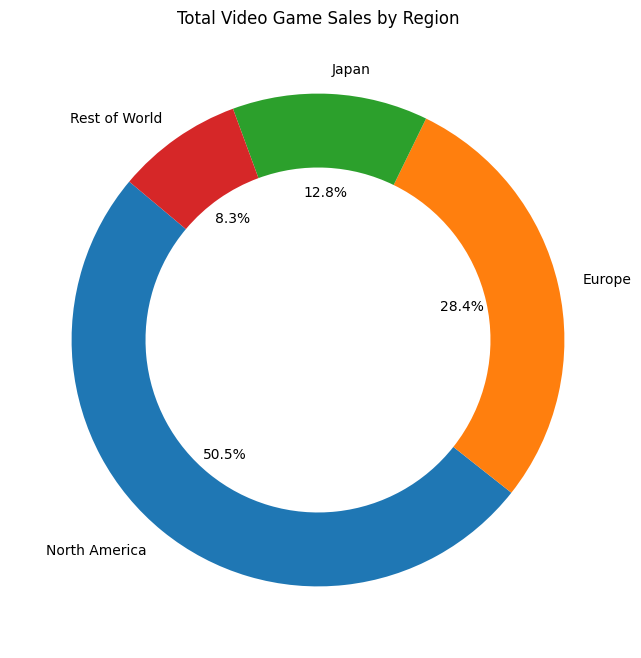

In [37]:
# Preparing data for the donut chart
# Aggregating total sales for each region across all genres
total_sales_by_region = regional_genre_preferences.sum(axis=0)

# Plotting the donut chart
plt.figure(figsize=(8, 8))
plt.pie(total_sales_by_region, labels=total_sales_by_region.index, autopct='%1.1f%%', startangle=140, wedgeprops=dict(width=0.3))
plt.title('Total Video Game Sales by Region')
plt.show()

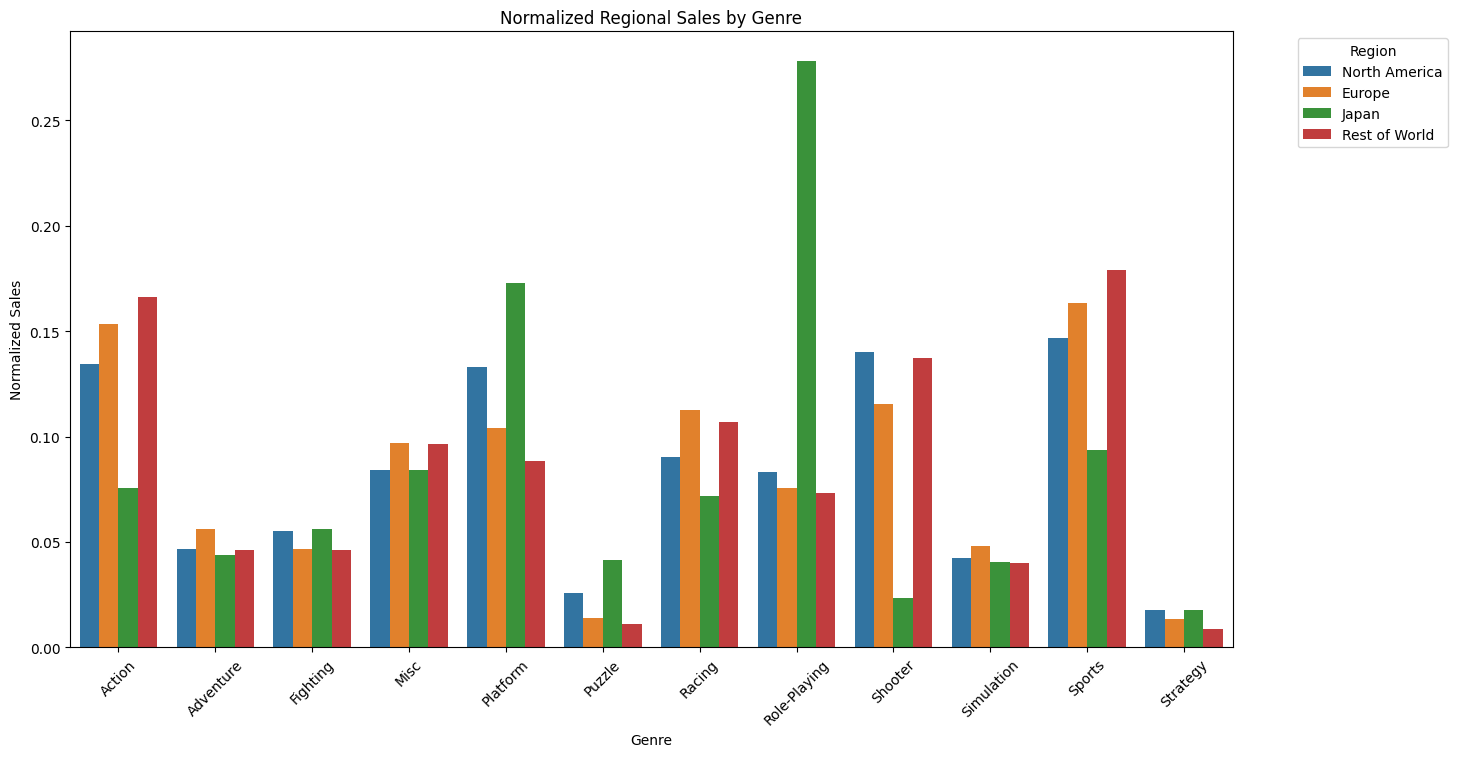

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming 'regional_genre_preferences' is the DataFrame with sales data by genre and region
# Here's how you can prepare and plot the bar chart:

# Normalizing the sales data to understand relative popularity of genres in each region
total_sales_per_region = regional_genre_preferences.sum()
normalized_regional_genre_preferences = regional_genre_preferences / total_sales_per_region

# Melting the DataFrame for easier plotting
melted_data = normalized_regional_genre_preferences.reset_index().melt(id_vars='Genre', var_name='Region', value_name='Normalized Sales')

# Plotting the bar chart
plt.figure(figsize=(15, 8))
sns.barplot(x='Genre', y='Normalized Sales', hue='Region', data=melted_data)
plt.title('Normalized Regional Sales by Genre')
plt.xlabel('Genre')
plt.ylabel('Normalized Sales')
plt.xticks(rotation=45)
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

**Regional Genre Preferences (Normalized Data):**

**North America:** Key genres include Shooter, Sports, and Action. These genres represent a significant portion of the gaming market in North America.

**Europe:** Similar to North America, Sports, Action, and Racing are popular. Europe shows a slightly higher preference for Racing games.

**Japan:** Role-Playing games hold a notably larger share in Japan compared to other regions. This underscores the unique gaming tastes in Japan, with a strong preference for RPGs.

**Rest of World:** Similar trends as North America and Europe, with Action, Sports, and Shooter genres being most popular.

**Total Sales Per Region:**

**North America:** Highest total sales, indicating it's the largest market among the regions considered.

**Europe:** Second in terms of total sales, a significant market but notably less than North America.

**Japan:** While having lower total sales, Japan shows distinct preferences, particularly in the popularity of Role-Playing games.

**Rest of World:** The smallest market in terms of total sales, with trends similar to North America and Europe.

**Insights for Marketing and Product Strategy:**

* The clear distinction in genre preferences, especially in Japan, suggests the importance of tailoring game development and marketing strategies to regional tastes.

* In North America and Europe, focusing on popular genres like Shooter, Sports, and Action could be more successful.

* For the Japanese market, investing in Role-Playing games could yield better engagement and sales.



# **Strategic Recommendations**

**Focus on Emerging Trends:** Publishers and developers should focus on genres and platforms showing upward trends to capture market interest.

**Quality vs. Popularity:** Balancing game quality (as indicated by review scores) and mass appeal (reflected in sales) is crucial. Different strategies might be needed for different genres and platforms.

**Tailored Regional Strategies:** Adopt region-specific marketing and development strategies based on local preferences, especially in distinct markets like **Japan**.

**Competitive Benchmarking:** Continuously benchmark against competitors' performance in terms of both sales and reviews to understand market positioning.

**Data-Driven Decision Making:** Leverage data analytics for strategic planning, including forecasting, market analysis, and consumer trends tracking.

[Hafida Belayd ](https://www.linkedin.com/in/hafida-belayd/)